<a href="https://colab.research.google.com/github/wmazza-br/wmazza-br/blob/main/Job_14_ML_Case_Mercado_Imobili%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🏢 <font color='blue' style='font-size: 30px;'>XXXX Case</font>🔑
<hr style='border: 2px solid blue;'>

Elaborado em Setembro de 22, pelo Eng. William Mazza 👷

##<font color='blue'>📊1. Case propriamente dito</font>
<hr style='border: 2px solid blue;'>

**Desafio e roteiro**

Seu desafio será construir um AVM utilizando os dados fornecidos e outras bases públicas que desejar. 

Abaixo construímos um roteiro para ajudar no desenvolvimento do AVM. Não é obrigatório responder todos os itens: a decisão sobre priorizar um item ou outro é sua, baseado no que aprendeu sobre a XXXX até agora. Segue o roteiro:


1. Limpeza da base. Explore a base e faça uma limpeza nos dados, se necessário. Que tratamentos você aplicou? Por quê?
2. Enriquecimento da base e feature engineering. Quais informações adicionais poderiam ser utilizadas além das fornecidas? Enriqueça a base com as informações que achar mais relevantes. Quais informações você adicionou?
3. Construção do modelo. Construa um modelo e monte um esquema de validação para testar o poder de generalização do seu modelo. Qual algoritmo foi utilizado? Como você validou o modelo? Qual é a métrica que você usou para avaliar o modelo? Qual foi o resultado?
4. Interpretabilidade do modelo. Suponha que os proprietários dos apartamentos com id's 7818, 9315 e 18338 na base pediram uma avaliação a partir do modelo. Qual é o preço dado pelo seu modelo? Como você justificaria esses preços para os proprietários?
5. Quantificação de risco. Suponha que os proprietários dos apartamentos com id's 7818, 9315 e 18338 na base estão pedindo, respectivamente, 400.000, 3.000.000 e 2.000.000 pelos seus apartamentos. Esses preços são razoáveis? Quão longe esses preços
estão da realidade do mercado?
6. Extrapolação do modelo. Suponha que você só tenha dados de treino dentro da região geográfica dada pelo bounding box limitado em latitude pelo intervalo(-23.5884,-23.5495) e em longitude pelo intervalo (-46.6817, -46.6379).Contudo, o seu modelo deve funcionar para toda a região de SP. Como você validaria o modelo? As variáveis que você coletou funcionariam nesse caso? Em quais regiões/apartamentos que estão fora do bounding box você espera que o modelo com dados limitados funcione bem?
7. Eficiência de amostra. Qual é o tamanho mínimo da base de treino para ter uma performance razoável (parecida com a performance da base completa)? Se você pudesse escolher somente 1000 linhas da base para treinar o modelo, quais linhas você escolheria?

**Entregável**


Você entregará seu case fazendo uma apresentação para a equipe de Data Science da XXXX em uma data combinada previamente. Sua apresentação poderá ser feita usando a mídia que preferir (Jupyter Notebook, Slides, etc). Na apresentação, deve estar clara a lógica que você utilizou para resolver o case, mostrando as suposições feitas e as repercussões de suas escolhas para o negócio. Pedimos que envie o material com 24 horas de antecedência da apresentação para nos
prepararmos.

###<font color='blue'>1.1 Legenda de símbolos utilizados</font>

📊: novo tópico

💡: análise

✅: resposta de alguma das perguntas do case

🏆: algo além do pedido

###<font color='blue'>1.2 Instalações necessárias</font>

In [ ]:
#algumas instalações necessárias

!pip install --upgrade geopandas
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 56.5 MB/s 
     |████████████████████████████████| 16.7 MB 47.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##<font color='blue'>📊2. Conhecimento da base</font>
<hr style='border: 2px solid blue;'>

###<font color='blue'>2.1 Acesso ao arquivo</font>

In [ ]:
#importar bibliotecas necessárias para ciência de dados em Python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#retirar avisos das bibliotecas

import warnings

warnings.filterwarnings('ignore')

In [ ]:
#liberar acesso ao arquivo no Google Drive

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#acessar arquivo fornecido

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Case XXXX/valuation_data.csv')

###<font color='blue'>2.2 Primeira limpeza da base 🧹 ✅</font>

In [ ]:
#avaliar se há dados faltantes (importante para modelos em ML)
#avaliar quais são variáveis categóricas e quais numéricas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        29006 non-null  int64 
 1   id                29006 non-null  int64 
 2   address           29006 non-null  object
 3   tower_name        28988 non-null  object
 4   building_type     29006 non-null  object
 5   rooms             29006 non-null  int64 
 6   garages           29006 non-null  int64 
 7   useful_area       29006 non-null  int64 
 8   latitude          29006 non-null  object
 9   longitude         29006 non-null  object
 10  point_estimate    29006 non-null  int64 
 11  minimum_estimate  29006 non-null  int64 
 12  maximum_estimate  29006 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 2.9+ MB


💡 <font color='blue'>Há 18 dados faltantes na variável **'tower_name'**. Para equalizar a base de dados, é importante deletar as linhas desses elementos vazios.</font>

In [ ]:
#contagem da base inicial

inicio = df.shape[1] * df.shape[0] -18

print ("O número de registros inicial é:", df.shape[0])
print ("O número de variáveis inicial é:", df.shape[1])
print ("O total de dados inicial é:", inicio)

O número de registros inicial é: 29006
O número de variáveis inicial é: 13
O total de dados inicial é: 377060


In [ ]:
#criar cópia da base de dados original

df1 = df.copy()

In [ ]:
#retirar linhas com dados faltantes, para o dataset ficar com 28988 registros

df1 = df1.dropna(how="any")

In [ ]:
#checar se há dados nulos remanescentes por engano

df1.isnull().sum()

Unnamed: 0          0
id                  0
address             0
tower_name          0
building_type       0
rooms               0
garages             0
useful_area         0
latitude            0
longitude           0
point_estimate      0
minimum_estimate    0
maximum_estimate    0
dtype: int64

💡 <font color='blue'>As colunas **'Unnamed: 0'** e **'id'** também não têm serventia, uma vez que o pandas cria um índice idêntico à esquerda no DataFrame</font>

In [ ]:
#deletar as colunas citadas que não agregam valor à análise

del df1["Unnamed: 0"], df1["id"]

In [ ]:
#contagem final da base após primeira limpeza de dados

inicio1 = df1.shape[1] * df1.shape[0]

print ("O número de registros atual é:", df1.shape[0])
print ("O número de variáveis atual é:", df1.shape[1])
print ("O total de dados da base atual é:", inicio1)
print ("Perda de dados da base atual em relação à base original:", inicio - inicio1, "de", inicio, "iniciais.")

O número de registros atual é: 28988
O número de variáveis atual é: 11
O total de dados da base atual é: 318868
Perda de dados da base atual em relação à base original: 58192 de 377060 iniciais.


###<font color='blue'>2.3 Converter latitude e longitude de string para valor numérico</font>

In [ ]:
#realizar a conversão das colunas

df1['latitude'] = pd.to_numeric(df1['latitude'], errors='coerce')
df1['longitude'] = pd.to_numeric(df1['longitude'], errors='coerce')

###<font color='blue'>2.4 Verter nome de variáveis ao Português</font>

In [ ]:
#visualizar base de dados

df1.sample(3)

,address,tower_name,building_type,rooms,garages,useful_area,latitude,longitude,point_estimate,minimum_estimate,maximum_estimate
6875,"Rua Tito, 19",Torre única,Apartamento,3,3,187,-23.528332,-46.691284,-1,-1,-1
4982,"Rua Reims, 92",Torre única,Apartamento,-1,-1,-1,-23.508368,-46.662312,-1,-1,-1
18128,"Rua Dr Jose Manoel, 72",Torre única,Cobertura,4,6,570,-23.537229,-46.661864,7463500,6343970,8583020


💡 <font color='blue'>É importante deixar os títulos das colunas em Português para maior entendimento geral</font>

In [ ]:
#criar variável com os novos títulos das colunas em Português, mas sem espaços e/ou caracteres especiais

a_renomear = {
              'address' : 'endereco',
              'tower_name' : 'nome_torre',
              'building_type' : 'tipo_imovel',
              'rooms' : 'quartos',
              'garages' : 'garagens',
              'useful_area' : 'area_util',
              'point_estimate' : 'valor_estimado',
              'minimum_estimate' : 'minimo_estimado',
              'maximum_estimate' : 'maximo_estimado'
}

df1 = df1.rename(columns = a_renomear)

In [ ]:
#visualizar a base de dados

df1.sample(3)

,endereco,nome_torre,tipo_imovel,quartos,garagens,area_util,latitude,longitude,valor_estimado,minimo_estimado,maximo_estimado
19867,"Rua George Schmidt, 193",Torre única,Apartamento,3,1,120,-23.524765,-46.711593,-1,-1,-1
10205,"Rua Nagel, 33",AROABA,Apartamento,4,3,158,-23.531906,-46.732360,1273140,1082170,1464120
10592,"Rua Celso Ramos, 86",Torre única,Apartamento,1,1,55,-23.626691,-46.746715,-1,-1,-1


###<font color='blue'>2.5 Checagem da base (3 variáveis categóricas)</font>

In [ ]:
#checar os dados únicos de cada variável

df1.nunique()

endereco           15415
nome_torre          2027
tipo_imovel            3
quartos                9
garagens              17
area_util            832
latitude           16451
longitude          16477
valor_estimado     18159
minimo_estimado    18185
maximo_estimado    18129
dtype: int64

####<font color='blue'>2.5.1 Variável 1: 'endereco'</font>

In [ ]:
df1.endereco.unique()

array(['Alameda Itu, 254', 'Alameda Santos, 1398',
       'Avenida Paulista, 1195', ..., 'Av. Brigadeiro Faria Lima, S/n',
       'Rua Teodoro Sampaio, S/n', 'Rua Saguairu, S/n'], dtype=object)

In [ ]:
df1.endereco.value_counts()

Torre 1                                                1784
1                                                       506
Torre 2                                                 185
A                                                       134
Torre A                                                 125
                                                       ... 
Rua das Grumixamas, 125                                   1
Avenida Francisco de Paula Quintanilha Ribeiro, 342       1
Avenida Guarapiranga, 550                                 1
Avenida Mofarrej, 346                                     1
Av. Angelica, 1777                                        1
Name: endereco, Length: 15415, dtype: int64

💡 <font color='blue'>Há muita variedade, e nenhuma informação de destaque.</font>

####<font color='blue'>2.5.2 Variável 2: 'nome_torre'</font>

In [ ]:
df1.nome_torre.unique()

array(['Torre única', 'Casa Branca', 'Marquesa de Santos', ...,
       'Taman Jardim Sul', 'Tree Morumbi', 'Único Zona Sul'], dtype=object)

In [ ]:
df1.nome_torre.value_counts()

Torre única                             23676
TORRE 1                                   128
TORRE 2                                   113
B                                         107
A                                         104
                                        ...  
A2                                          1
B1                                          1
B2                                          1
Jardins de France-Jardins Des Arbres        1
Cores da Barra                              1
Name: nome_torre, Length: 2027, dtype: int64

💡 <font color='blue'>Apesar de 'Torre única' aparecer na esmagadora maioria dos registros, entendeu-se que a descrição dessa variável não afeta de forma geral os resultados da base.</font>

####<font color='blue'>2.5.3 Variável 3: 'tipo_imovel'</font>

In [ ]:
#a variável 'tipo_imovel' precisa ser verificada para coerência entre comparações

df1.tipo_imovel.unique()

array(['Apartamento', 'Cobertura', 'Conjunto'], dtype=object)

In [ ]:
#é necessário conhecer a diferença de distribuição entre os 3 tipos de imóveis

df1.tipo_imovel.value_counts()

Apartamento    23026
Cobertura       4501
Conjunto        1461
Name: tipo_imovel, dtype: int64

In [ ]:
#importante verificar as diferenças de comportamento entre os tipos de imóveis

df1.groupby("tipo_imovel").mean()

,quartos,garagens,area_util,latitude,longitude,valor_estimado,minimo_estimado,maximo_estimado
tipo_imovel,,,,,,,,
Apartamento,2.219708,1.381004,108.528316,-23.555340,-46.651828,1.036264e+06,8.753733e+05,1.199447e+06
Cobertura,3.307487,3.166407,289.269940,-23.562230,-46.686148,3.317678e+06,2.809446e+06,3.830967e+06
Conjunto,-1.000000,-0.013689,182.951403,-24.909537,-46.666530,-1.000000e+00,-1.000000e+00,-1.000000e+00


💡  <font color='blue'>Não é bom deixar apartamentos e coberturas na mesma base para análise, uma vez que as coberturas (15% do total de registros) distorcem demais a dispersão e os resultados da estatística descritiva. 

Quanto ao tipo 'conjunto' (5% do total de registros), não está agregando valor à análise, e deverá ser retirado também.</font>

###<font color='blue'>2.6 Segunda limpeza da base 🧹 ✅</font>

In [ ]:
#criar cópia da base de dados

df1a = df1.copy()

In [ ]:
# retirar coberturas e conjuntos da base

registros_a_retirar = df1a[(df1a["tipo_imovel"] == "Cobertura") | (df1a["tipo_imovel"] == "Conjunto")].index

df1a.drop(registros_a_retirar , inplace=True)

In [ ]:
# checar a efetividade da ação

df1a.tipo_imovel.unique()

array(['Apartamento'], dtype=object)

In [ ]:
#contagem final da base após segunda limpeza de dados

inicio1a = df1a.shape[1] * df1a.shape[0]

print ("O número de registros atual é:", df1a.shape[0])
print ("O número de variáveis atual é:", df1a.shape[1])
print ("O total de dados da base atual é:", inicio1a)
print ("Perda de dados da base atual em relação à 1ª limpeza:", inicio - inicio1a, "de", inicio, "iniciais.")

O número de registros atual é: 23026
O número de variáveis atual é: 11
O total de dados da base atual é: 253286
Perda de dados da base atual em relação à 1ª limpeza: 123774 de 377060 iniciais.


##<font color='blue'>📊3. Avaliação estatística da base (variáveis quantitativas)</font>
<hr style='border: 2px solid blue;'>

###<font color='blue'>3.1 Checagem da coerência da base</font>

In [ ]:
#manter a base tratada preservada

df2 = df1a.copy()

In [ ]:
#analisar estatística descritiva

df2.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
quartos,23026.0,2.0,1.0,-1.0,2.0,3.0,3.0,8.0
garagens,23026.0,1.0,2.0,-1.0,1.0,1.0,2.0,12.0
area_util,23026.0,109.0,95.0,-1.0,55.0,85.0,140.0,1528.0
latitude,23020.0,-24.0,1.0,-26.0,-24.0,-24.0,-24.0,24.0
longitude,23020.0,-47.0,1.0,-67.0,-47.0,-47.0,-47.0,47.0
valor_estimado,23026.0,1036264.0,1486284.0,-1.0,-1.0,696108.0,1312170.0,27240500.0
minimo_estimado,23026.0,875373.0,1257665.0,-1.0,-1.0,588756.0,1110665.0,22938100.0
maximo_estimado,23026.0,1199447.0,1718366.0,-1.0,-1.0,806198.0,1521300.0,32688600.0


💡 Análise do DataFrame:

* variável '**quartos**': média e mediana próximas, mínimo incoerente, máximo muito alto
* variável '**garagens**': média e mediana iguais, mínimo incoerente, máximo muito alto
* variável '**area_util**': média e mediana não muito distantes, mínimo incoerente, máximo muito alto
* variável '**latitude**': média e mediana iguais, mínimo incoerente, máximo incoerente
* variável '**longitude**': média e mediana iguais, mínimo incoerente, máximo incoerente
* variável '**valor_estimado**': média e mediana muito distantes, mínimo e 1º quartil incoerentes, máximo absurdamente alto
* variável '**minimo_estimado**': média e mediana não muito distantes, mínimo e 1º quartil incoerentes, máximo absurdamente alto
* variável '**maximo_estimado**': média e mediana não muito distantes, mínimo e 1º quartil incoerentes, máximo absurdamente alto

###<font color='blue'>3.2 Terceira limpeza da base 🧹 ✅</font>

In [ ]:
'''
   como quase todas variáveis numéricas apresentam valor de -1, 
   criar função para deletar registros nessa condição
'''

#lista criada, exceto as variáveis latitude e longitude que necessariamente são valores negativos

lista = ['quartos', 
         'garagens', 
         'area_util', 
         'valor_estimado', 
         'minimo_estimado', 
         'maximo_estimado'
]

#criar função para apagar valores inconsistentes

def apaga_valor_incoerente(lista):

  for item in lista:
    dataframe_sujo = df2[(df2[item] < 0)].index
    df2.drop(dataframe_sujo , inplace=True)

apaga_valor_incoerente(lista)

In [ ]:
#verificação da operação

df2.describe().round(2)

,quartos,garagens,area_util,latitude,longitude,valor_estimado,minimo_estimado,maximo_estimado
count,15377.00,15377.00,15377.00,15377.00,15377.00,15377.00,15377.00,15377.00
mean,2.82,1.97,135.93,-23.56,-46.67,1495191.35,1263321.83,1730236.03
std,0.90,1.16,93.78,0.67,0.96,1598497.68,1352979.02,1847924.89
min,1.00,1.00,22.00,-25.62,-66.74,160756.00,134018.00,184869.00
25%,2.00,1.00,73.00,-23.61,-46.69,654291.00,552545.00,756742.00
50%,3.00,2.00,109.00,-23.57,-46.66,1021180.00,863095.00,1181330.00
75%,3.00,2.00,170.00,-23.55,-46.64,1736660.00,1466090.00,2005450.00
max,8.00,12.00,1223.00,23.54,46.61,27240500.00,22938100.00,32688600.00


In [ ]:
#contagem final da base após terceira limpeza de dados

inicio3 = df2.shape[1] * df2.shape[0]

print ("O número de registros atual é:", df2.shape[0])
print ("O número de variáveis atual é:", df2.shape[1])
print ("O total de dados da base atual é:", inicio3)
print ("Perda de dados da base atual em relação à 1ª limpeza:", inicio - inicio3, "de", inicio, "iniciais.")

O número de registros atual é: 15377
O número de variáveis atual é: 11
O total de dados da base atual é: 169147
Perda de dados da base atual em relação à 1ª limpeza: 207913 de 377060 iniciais.


###<font color='blue'>3.3 Checagem de outliers (variáveis quantitativas)</font>

Os outliers prejudicam as análises globais, distorcendo a base de dados e os futuros modelos de predição, por isso, a boa prática de estatística impele por sua retirada.

####<font color='blue'>3.3.1 Variável 'quartos'</font>

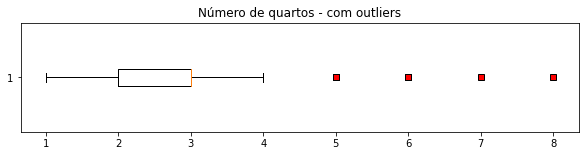

In [ ]:
marcador = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Número de quartos - com outliers')
ax.boxplot(df2.quartos, vert=False, flierprops=marcador)
plt.show()

💡 <font color='blue'>Apenas 4 outliers a serem retirados da base.</font>

####<font color='blue'>3.3.2 Variável 'garagens'</font>

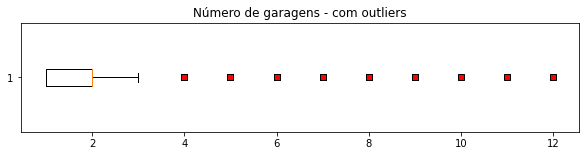

In [ ]:
marcador = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Número de garagens - com outliers')
ax.boxplot(df2.garagens, vert=False, flierprops=marcador)
plt.show()

💡 <font color='blue'>Apenas 9 outliers a serem retirados da base.</font>

####<font color='blue'>3.3.3 Variável 'area_util'</font>

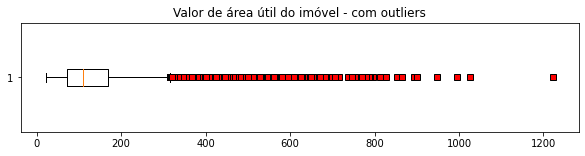

In [ ]:
marcador = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Valor de área útil do imóvel - com outliers')
ax.boxplot(df2.area_util, vert=False, flierprops=marcador)
plt.show()

💡 <font color='blue'>Nota-se uma grande dispersão dos valores, com muitos outliers.</font>

####<font color='blue'>3.3.4 Variável 'latitude'</font>

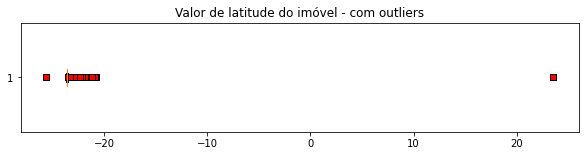

In [ ]:
marcador = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Valor de latitude do imóvel - com outliers')
ax.boxplot(df2.latitude, vert=False, flierprops=marcador)
plt.show()

💡 <font color='blue'>Nesse caso, outliers são apontamentos errados, que devem ser retirados da base.</font>

####<font color='blue'>3.3.5 Variável 'longitude'</font>

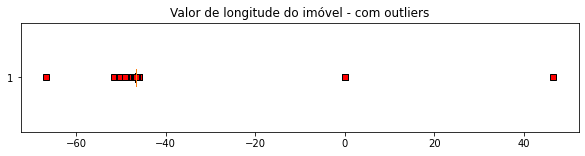

In [ ]:
marcador = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Valor de longitude do imóvel - com outliers')
ax.boxplot(df2.longitude, vert=False, flierprops=marcador)
plt.show()

💡 <font color='blue'>Nesse caso, outliers são apontamentos errados, que devem ser retirados da base.</font>

####<font color='blue'>3.3.6 Variável 'valor_estimado'</font>

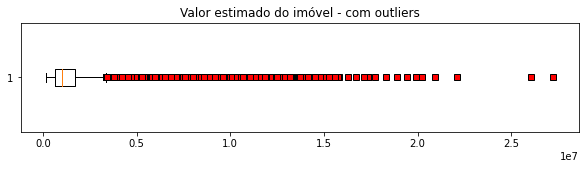

In [ ]:
marcador = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Valor estimado do imóvel - com outliers')
ax.boxplot(df2.valor_estimado, vert=False, flierprops=marcador)
plt.show()

💡 <font color='blue'>Nota-se uma grande dispersão dos valores, com muitos outliers.</font>

####<font color='blue'>3.3.7 Variável 'minimo_estimado'</font>

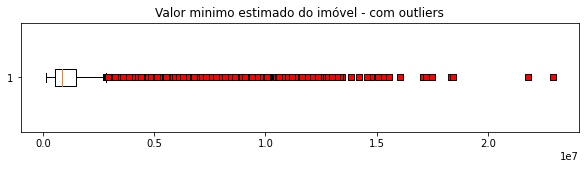

In [ ]:
marcador = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Valor minimo estimado do imóvel - com outliers')
ax.boxplot(df2.minimo_estimado, vert=False, flierprops=marcador)
plt.show()

💡 <font color='blue'>Nota-se uma grande dispersão dos valores, com muitos outliers.</font>

####<font color='blue'>3.3.8 Variável 'maximo_estimado'</font>

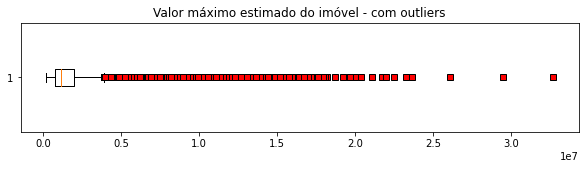

In [ ]:
marcador = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Valor máximo estimado do imóvel - com outliers')
ax.boxplot(df2.maximo_estimado, vert=False, flierprops=marcador)
plt.show()

💡 <font color='blue'>Nota-se uma grande dispersão dos valores, com muitos outliers.</font>

###<font color='blue'>3.4 Retirada de outliers (quarta limpeza da base 🧹 ✅)</font>

Há muita discrepância e variabilidade entre os imóveis da base. Isso enfraquece o modelo, na medida em que mistura itens completamente diferentes entre si, inclusive em ordens de grandeza de variáveis.

In [ ]:
#momento para preservar a base com os outliers

df3 = df2.copy()

In [ ]:
#criar função para retirada de outliers

lista = ['quartos', 
         'garagens', 
         'area_util', 
         'latitude',
         'longitude',
         'valor_estimado', 
         'minimo_estimado', 
         'maximo_estimado'
]

def retira_outliers(lista):
  
  for item in lista:
    valor = df3[item]
    Q1 = valor.quantile(.25)
    Q3 = valor.quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    outliers = df3[(df3[item] <= limite_inferior) | (df3[item] >= limite_superior)].index

    df3.drop(outliers , inplace=True)

retira_outliers(lista)

In [ ]:
#contagem final da base após quarta limpeza de dados

inicio4 = df3.shape[1] * df3.shape[0]

print ("O número de registros atual é:", df3.shape[0])
print ("O número de variáveis atual é:", df3.shape[1])
print ("O total de dados da base atual é:", inicio4)
print ("Perda de dados da base atual em relação à 1ª limpeza:", inicio - inicio4, "de", inicio, "iniciais.")

O número de registros atual é: 11963
O número de variáveis atual é: 11
O total de dados da base atual é: 131593
Perda de dados da base atual em relação à 1ª limpeza: 245467 de 377060 iniciais.


###<font color='blue'>3.5 Checagem após retirada de outliers</font>

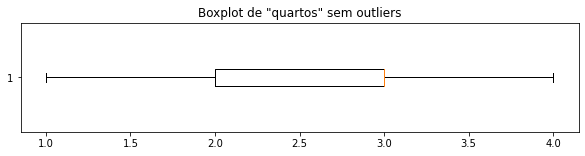

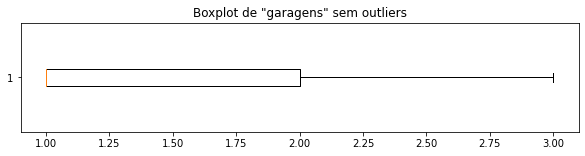

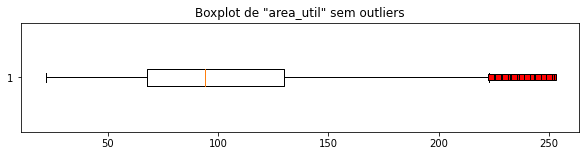

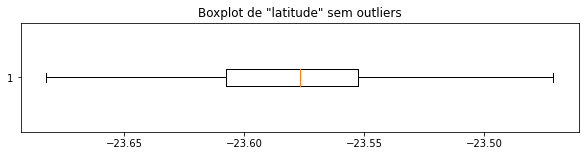

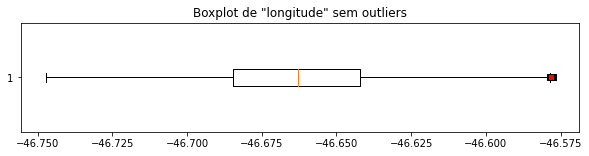

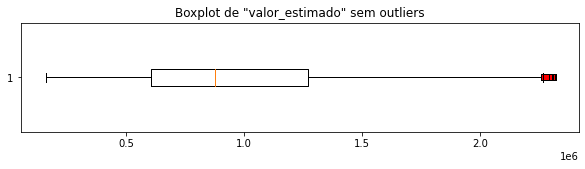

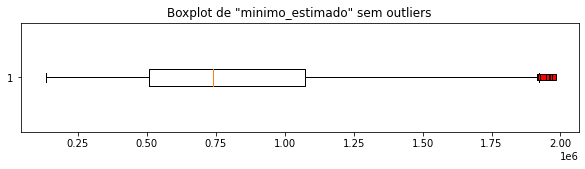

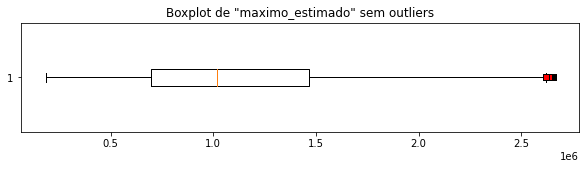

In [ ]:
#como se trata apenas de conferência, basta uma função para plotar todos boxplot de uma só vez

def plotar_boxplots(lista):

  for item in lista:
    marcador = dict(markerfacecolor='r', marker='s')
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_title(f'Boxplot de "{item}" sem outliers')
    ax.boxplot(df3[item], vert=False, flierprops=marcador)
    plt.show()

plotar_boxplots(lista)

In [ ]:
#checagem de coerência via estatística básica

df3.describe().round(2)

,quartos,garagens,area_util,latitude,longitude,valor_estimado,minimo_estimado,maximo_estimado
count,11963.00,11963.00,11963.00,11963.00,11963.00,11963.00,11963.00,11963.00
mean,2.59,1.57,102.32,-23.58,-46.67,981416.54,829718.32,1135364.04
std,0.83,0.69,44.87,0.04,0.03,480604.52,407262.05,555327.06
min,1.00,1.00,22.00,-23.68,-46.75,160756.00,134018.00,184869.00
25%,2.00,1.00,68.00,-23.61,-46.68,603978.00,509295.50,698957.00
50%,3.00,1.00,94.00,-23.58,-46.66,877633.00,740118.00,1016330.00
75%,3.00,2.00,130.00,-23.55,-46.64,1269575.00,1074695.00,1467930.00
max,4.00,3.00,252.00,-23.47,-46.58,2309660.00,1973680.00,2656110.00


💡 Análise do DataFrame após 3 limpezas:

* variável '**quartos**': havia 4 outliers, que foram retirados
* variável '**garagens**': antes havia residência com 16 vagas de garagens, agora o máximo é de 3
* variável '**area_util**': antes havia residência com 1975 de área útil, agora o máximo é de 252
* variável '**latitude**': valores muito coerentes agora
* variável '**longitude**': valores muito coerentes agora
* variável '**valor_estimado**': antes havia residência com 47 milhões de valor, agora o máximo é de 2.2 
* variável '**minimo_estimado**': antes havia residência com 42 milhões de valor, agora o máximo é de 1.9
* variável '**maximo_estimado**': antes havia residência com 53 milhões de valor, agora o máximo é de 2.6

In [ ]:
#checagem do tamanho atual do DataFrame

df3.shape

(11963, 11)

###<font color='blue'>3.6 Visualização dos imóveis no mapa 🌎</font>

📎 Fonte externa dos dados: IBGE, em (https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/UFs/SP/)

In [ ]:
#instalar bibliotecas necessárias

import geopandas as gpd
from shapely.geometry import Point

In [ ]:
#realizar cópia segura do DataFrame

geo_df = df3.copy()

In [ ]:
#preparativos para criar GeoDataFrame

x = zip(geo_df.longitude, geo_df.latitude)

geometry = [Point(x) for x in zip(geo_df.longitude, geo_df.latitude)]

In [ ]:
#criar GeoDataFrame

crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(geo_df, crs = crs, geometry = geometry)

In [ ]:
#checar efetividade das ações

type(geo_dados)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#visualizar GeoDataFrame

geo_dados.sample(3)

,endereco,nome_torre,tipo_imovel,quartos,garagens,area_util,latitude,longitude,valor_estimado,minimo_estimado,maximo_estimado,geometry
28331,Torre A,TORRE B,Apartamento,3,2,110,-23.616462,-46.631156,859030,730176,987884,POINT (-46.63116 -23.61646)
7220,"Rua Ernesto de Oliveira, 189",Torre única,Apartamento,3,2,76,-23.592520,-46.625313,659503,560577,758428,POINT (-46.62531 -23.59252)
18897,"Rua Engenheiro Prudente, 35",Torre única,Apartamento,1,1,63,-23.571636,-46.616487,589485,471588,707382,POINT (-46.61649 -23.57164)


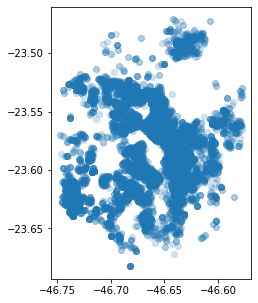

In [ ]:
#visualizar pontos de localização dos imóveis

geo_dados.plot(figsize=(7,5), alpha=0.2)

In [ ]:
#buscar o mapa da cidade de São Paulo

sp = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Case XXXX/Geopandas/01Dados/Mapas/SP-MUNIC/SP-MUNIC.shp')

In [ ]:
#equalizar os 'crs' conforme a documentação do GeoPandas

sp = sp.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
#verificar a equidade dos 'crs'

sp.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
#verificar a equidade dos 'crs'

geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

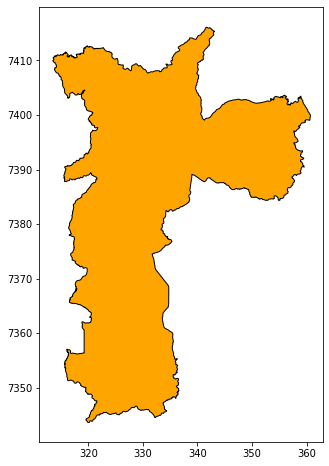

In [ ]:
sp.plot(color='orange', edgecolor='black', figsize=(15, 8))

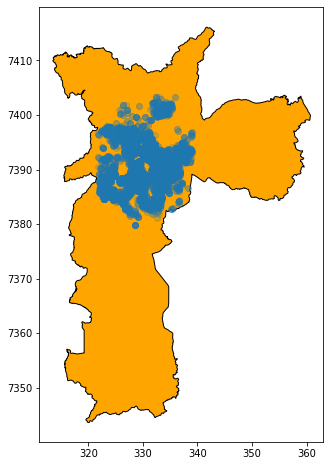

In [ ]:
#visualizar os dados de localização dos imóveis no mapa de São Paulo

base = sp.plot(color='orange', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=0.2)

💡 <font color='blue'>Essa visualização ajuda muito a perceber a concentração dos imóveis (retirados os outliers) em derredor do centro de São Paulo.

Certamente, isso favorecerá o modelo preditivo, uma vez que se trata de imóveis inseridos num mesmo ambiente e contexto.</font>

###<font color='blue'>3.7 Matriz de correlações</font>

In [ ]:
#conhecer as correlações entre as variáveis

df3.corr().round(4)

,quartos,garagens,area_util,latitude,longitude,valor_estimado,minimo_estimado,maximo_estimado
quartos,1.0000,0.5811,0.7287,0.0154,-0.0799,0.5810,0.5835,0.5781
garagens,0.5811,1.0000,0.5527,-0.0720,-0.1463,0.4925,0.4951,0.4895
area_util,0.7287,0.5527,1.0000,0.0820,-0.0877,0.8444,0.8469,0.8415
latitude,0.0154,-0.0720,0.0820,1.0000,0.1219,0.1068,0.1041,0.1093
longitude,-0.0799,-0.1463,-0.0877,0.1219,1.0000,-0.0909,-0.0935,-0.0886
valor_estimado,0.5810,0.4925,0.8444,0.1068,-0.0909,1.0000,0.9994,0.9996
minimo_estimado,0.5835,0.4951,0.8469,0.1041,-0.0935,0.9994,1.0000,0.9981
maximo_estimado,0.5781,0.4895,0.8415,0.1093,-0.0886,0.9996,0.9981,1.0000


💡 Análise das correlações:

* variável '**quartos**': forte correlação com área útil
* variável '**garagens**': correlações moderadas com todas variáveis
* variável '**area_util**': forte correlação com quartos
* variáveis '**latitude**' e '**longitude**': não apresentam correlações fortes com ninguém, e serão descartadas
* variável '**valor_estimado**': forte correlação com área útil
* variável '**minimo_estimado**': correlação praticamente 1 com valor estimado, por isso será descartada 🔴
* variável '**maximo_estimado**': correlação praticamente 1 com valor estimado, por isso será descartada 🔴

🔴: "*A matriz exibe a correlação entre as estimativas de parâmetro. Se as estimativas de parâmetros são altamente correlacionadas, considere a redução do número de parâmetros para simplificar o modelo*." fonte: (https://support.minitab.com/pt-br/minitab/21/help-and-how-to/statistical-modeling/regression/how-to/nonlinear-regression/interpret-the-results/all-statistics-and-graphs/regression-equation-and-parameter-estimates/)

##<font color='blue'>📊4. Método da Regressão Linear ✅</font>

Há muitos modelos preditivos de Machine Learning, que variam de acordo com a natureza do *business case*.

Quando se trata de estimar um valor (variável contínua) dependente de outras variáveis, a regressão linear é a opção mais interessante.

Descarta-se Regressão Logística, que é mais adequada em casos de respostas binárias, tais quais "vende ou não vende", "desiste ou não desiste" e "é fraude ou não é fraude".

Assim como outros modelos de Machine Learning, como Decision Tree, Random Forest e KNN, por exemplo, também são mais adequados à soluções de saídas binárias.
<hr style='border: 2px solid blue;'>

###<font color='blue'>Teoria sobre Regressão:</font>

fonte: Minitab, em (https://support.minitab.com/pt-br/minitab/21/help-and-how-to/statistical-modeling/regression/how-to/fit-regression-model/interpret-the-results/all-statistics-and-graphs/regression-equation/)

Equação de regressão

Use a equação de regressão, para descrever a relação entre a resposta e os termos no modelo. 

A equação de regressão é uma representação algébrica da linha de regressão. 

A equação de regressão para o modelo linear assume a seguinte forma: **Y= b0 + b1x1**. 

Na equação de regressão, **Y** é a variável de resposta, **b0** é a constante ou intercepto, **b1** é o valor do coeficiente do termo linear (também conhecido como inclinação da linha), e x1 é o valor do termo.

A equação de regressão com mais de um termo toma a seguinte forma:

**y = b0 + b1X1 + b2X2 + ... + bkXk**

Na equação de regressão, as letras representam o seguinte:


*   **y** é a variável de resposta (ou dependente)
*   **b0** é a constante
*   **b1, b2, ..., bk** são os coeficientes
*   **X1, X2, ..., Xk** são os valores do termo

###<font color='blue'>4.1 Análise do comportamento da variável dependente</font>

A variável dependente adotada foi **valor_estimado**. Também, como visto acima, as outras duas variáveis 'minimo_estimado' e 'maximo_estimado' apresentam correlação praticamente igual a +1, e por isso não seguirão na análise.

####<font color='blue'>4.1.1 Distribuição de frequência da variável dependente</font>

Quanto mais próxima de uma curva normal, maior será a qualidade das análises e previsões à frente.

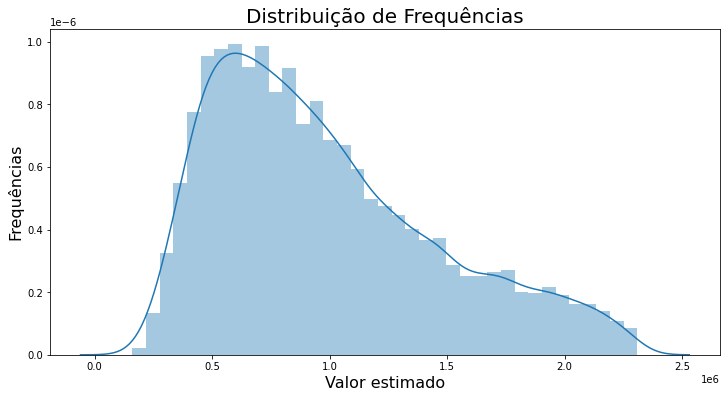

In [ ]:
#criar gráfico de distribuição de frequências da variável dependente  

fig, ax = plt.subplots(figsize=(10, 2))
ax = sns.distplot(df3["valor_estimado"])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('Valor estimado', fontsize=16)
plt.show()

💡 <font color='blue'>Nitidamente, a curva acima não representa uma curva normal, e se reflitirá na qualidade da predição posterior.


Sendo assim, será necessário tomar alguma decisão de como proceder para melhorar a qualidade do modelo a ser desenhado.</font>

####<font color='blue'>4.1.2 Reavaliação da relação entre a variável dependente e outras possíveis</font>

As correlações já foram vistas anteriormente, sendo que esta checagem se trata apenas de mais uma validação de consitência entre os dados, só que com mais detalhes

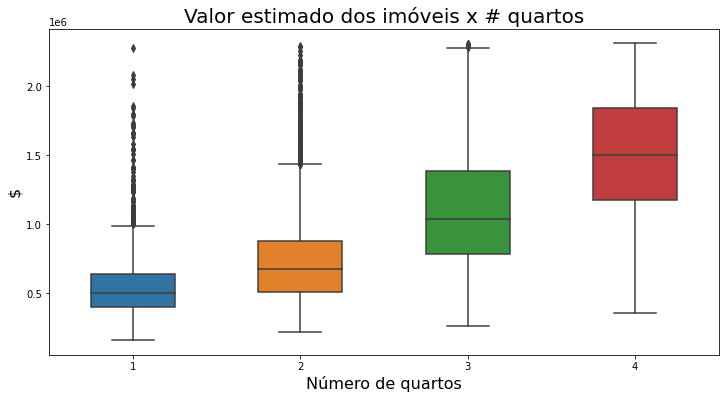

In [ ]:
#criar boxplots entre a variável dependente e a variável 'quartos'

fig, ax = plt.subplots(figsize=(10, 2))
ax = sns.boxplot(y='valor_estimado', x='quartos', data=df3, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor estimado dos imóveis x # quartos', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de quartos', fontsize=16)
plt.show()

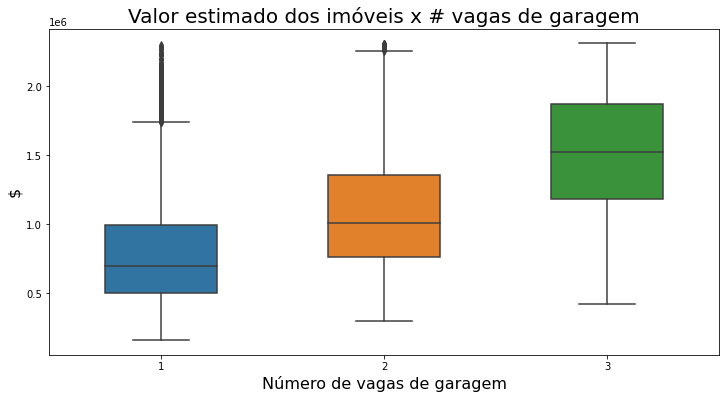

In [ ]:
#criar boxplots entre a variável dependente e a variável 'garagens'

fig, ax = plt.subplots(figsize=(10, 2))
ax = sns.boxplot(y='valor_estimado', x='garagens', data=df3, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor estimado dos imóveis x # vagas de garagem', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de vagas de garagem', fontsize=16)
plt.show()

💡 <font color='blue'>Nenhuma surpresa na análise dos boxplots acima, quanto mais quartos e vagas de garagem, maiores as estimativas de preços.</font>

####<font color='blue'>4.1.3 Dispersão entre a variável dependente e outras possíveis</font>

As correlações já foram vistas anteriormente, sendo que esta checagem se trata apenas de mais uma validação de consitência entre os dados, só que com mais detalhes

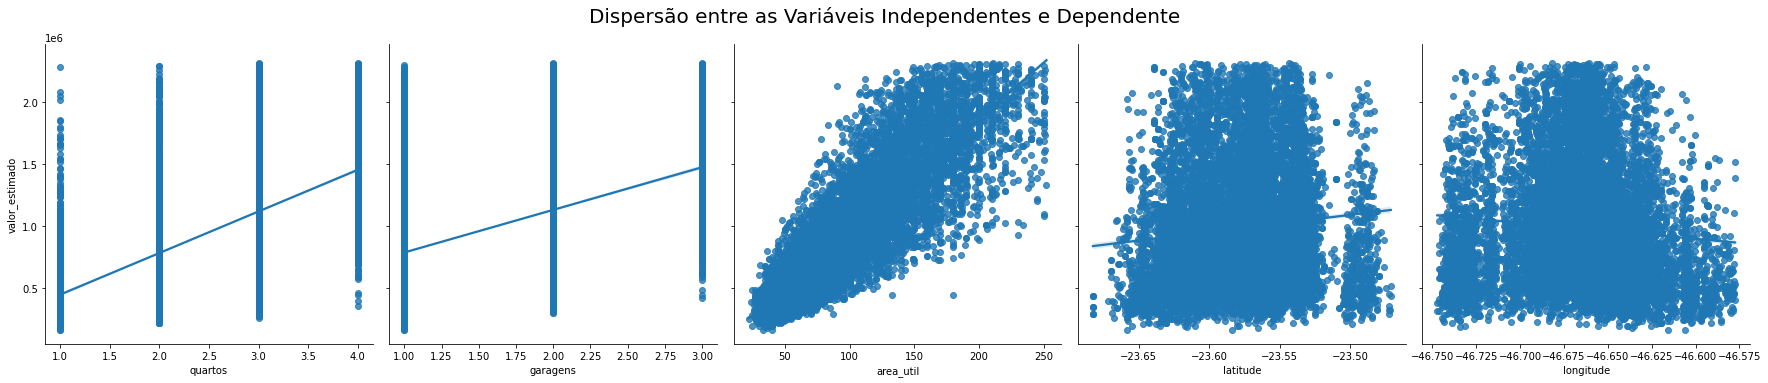

In [ ]:
#criar boxplots entre a variável dependente e a variável 'garagens'

ax = sns.pairplot(df3, y_vars='valor_estimado', x_vars=['quartos', 'garagens', 'area_util', 'latitude', 'longitude'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Independentes e Dependente', fontsize=20, y=1.05)
plt.show()

💡 <font color='blue'>Esses gráficos funcionam como reforço das correlações vistas no item 3.6, deixando claro que a regressão linear terá como variáveis independentes e que afetam a dependente: número de quartos, número de vagas de garagem e, principalmente, área útil dos imóveis.
Preocupa também a 'abertura de cone' na principal variável, 'area_util', correlacionada com a variável dependente.</font>

###<font color='blue'>4.2 Transformação de dados</font>

Como vimos em 4.1.1, a distribuição de frequências está assimétrica. Uma das opções viáveis é tratar os dados com logaritmo, de modo a diminuir as ordens de grandezas entre as variáveis, da casa de 6 dígitos para a variável dependente, e apenas 1, 2 e 3 das independentes.

In [ ]:
#hora de proteger mais uma vez a base de dados

df4 = df3.copy()

####<font color='blue'>4.2.1 Cálculo do logaritmo das 3 variáveis independentes escolhidas</font>

In [ ]:
#criação de 4 novas colunas no DataFrame

df4['log_valor_estimado'] = np.log(df4['valor_estimado'])
df4['log_quartos'] = np.log(df4['quartos'])
df4['log_garagens'] = np.log(df4['garagens'])
df4['log_area_util'] = np.log(df4['area_util'])

In [ ]:
#verificação do DataFrame

df4.sample(3)

,endereco,nome_torre,tipo_imovel,quartos,garagens,area_util,latitude,longitude,valor_estimado,minimo_estimado,maximo_estimado,log_valor_estimado,log_quartos,log_garagens,log_area_util
15056,"Rua Capitão Rabelo, 266",Torre única,Apartamento,3,3,100,-23.493556,-46.620553,965865,801668,1139720,13.780779,1.098612,1.098612,4.605170
10108,"Rua Onofre Silveira, 289",Torre única,Apartamento,2,1,70,-23.659819,-46.639563,289393,245984,332802,12.575541,0.693147,0.000000,4.248495
20168,"Rua Guilherme Bannitz, 72",Torre única,Apartamento,2,1,70,-23.589302,-46.672732,776070,644138,915763,13.561998,0.693147,0.000000,4.248495


####<font color='blue'>4.2.1 Distribuição de frequência do logaritmo da variável dependente</font>

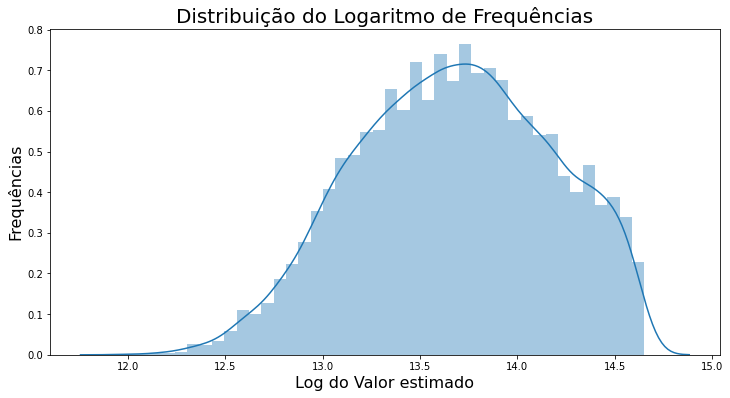

In [ ]:
#criar gráfico de distribuição de frequências do logaritmo da variável dependente  

fig, ax = plt.subplots(figsize=(10, 2))
ax = sns.distplot(df4["log_valor_estimado"])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição do Logaritmo de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('Log do Valor estimado', fontsize=16)
plt.show()

💡 <font color='blue'>Não ficou a curva normal dos sonhos, mas certamente, como veremos à frente, vai melhorar a precisão da relação da variável dependente com as independentes.</font>

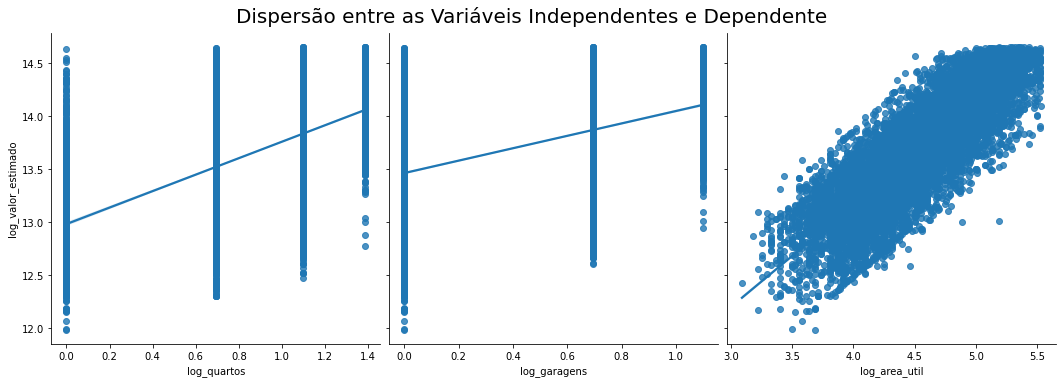

In [ ]:
ax = sns.pairplot(df4, y_vars='log_valor_estimado', x_vars=['log_quartos', 'log_garagens', 'log_area_util'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Independentes e Dependente', fontsize=20, y=1.05)
plt.show()

💡 <font color='blue'>Não houve notável mudança nas variáveis de número de quartos e vags de garagem, mas houve sim significativa melhora na principal variável independente - área útil - da futura regressão a ser criada. 

O efeito de abertura de cone na dispersão foi eliminado.</font>

###<font color='blue'>4.3 Criação dos dados de treino e teste</font>

Esse é o momento em que se inicia de fato a criação do modelo preditivo.

É importante separar os conjuntos de dados de treino e testes para checar a efetividade do modelo de regressão a ser criado.

In [ ]:
#importar a biblioteca necessária

from sklearn.model_selection import train_test_split

In [ ]:
#criar Series com a variável dependente

Y = df4['log_valor_estimado']

In [ ]:
#criar DataFrame com as variáveis explicativas

x = df4[['log_quartos', 'log_garagens', 'log_area_util']]

#separar 20% da base para dados de teste

train_test_split(x, Y, test_size=0.2, random_state=1000)

[       log_quartos  log_garagens  log_area_util
 3316      1.386294      1.098612       4.700480
 9586      1.098612      0.693147       5.192957
 9228      0.000000      0.000000       3.988984
 1118      1.098612      0.693147       5.438079
 19141     1.098612      0.693147       4.897840
 ...            ...           ...            ...
 5291      0.000000      0.000000       3.688879
 7699      1.098612      1.098612       4.653960
 12404     1.386294      1.098612       4.615121
 9270      1.098612      0.000000       4.248495
 21912     1.098612      1.098612       4.770685
 
 [9570 rows x 3 columns],        log_quartos  log_garagens  log_area_util
 6877      0.000000      0.000000       3.850148
 25697     0.693147      0.000000       4.158883
 8433      0.693147      0.000000       4.077537
 887       1.098612      0.693147       4.836282
 5697      1.098612      0.000000       4.574711
 ...            ...           ...            ...
 16614     1.386294      0.693147       4.

In [ ]:
#criar datasets de treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(x, Y, test_size=0.2, random_state=1000)

In [ ]:
#conhecer dados de treino

X_treino.sample(3)

,log_quartos,log_garagens,log_area_util
18240,1.098612,0.693147,4.248495
705,1.098612,0.000000,4.700480
1751,1.098612,0.693147,4.867534


###<font color='blue'>4.4 Regressão linear ✅</font>

In [ ]:
#importar a biblioteca necessária

import statsmodels.api as sm

In [ ]:
#estimar modelo com statsmodels, segundo a documentação

X_treino_com_constante = sm.add_constant(X_treino)
X_treino_com_constante.sample(2)

,const,log_quartos,log_garagens,log_area_util
24227,1.0,0.693147,0.000000,4.189655
10590,1.0,1.098612,0.693147,4.262680


In [ ]:
#criar modelo OLS (Ordinary Least Squares)

modelo_statsmodels = sm.OLS(y_treino,X_treino_com_constante,hasconst = True).fit()

####<font color='blue'>4.4.1 Avaliação do modelo de regressão estimado ✅</font>
Escolhido o método dos Mínimos Quadrados para avaliação da Regressão.


In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:     log_valor_estimado   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     8796.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:06:34   Log-Likelihood:                -632.83
No. Observations:                9570   AIC:                             1274.
Df Residuals:                    9566   BIC:                             1302.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.0041      0.037    246.333

✅ 💡 Análise estatística do modelo:

* '**R-squared**': valor de 0.734, que é um bom valor, próximo de 1 (também significa que **73,4% da variância na variável de resultados é explicada pelo modelo**;
* '**coef**': valor de 9.0041, que é o logaritmo do valor estimado, quando todas outras variáveis forem zero;
* '**coef log_quartos**': -0.2402, causou estranheza, na medida em que é sabido que quanto mais quartos, maior o valor estimado;
* '**coef log_garagens**': 0.0919, coerente com a correlação vista anteriormente;
* '**coef log_area_util**': 1.0705, extremamente coerente com a correlação vista anteriormente;
* '**P>|t|**': como todos foram abaixo de 0.05, todas variáveis selecionadas apresentam relevância estatística, e seguem no jogo;


####<font color='blue'>4.4.2 Estimativa do modelo propriamente dito</font>

In [ ]:
#importar as bibliotecas necessárias

from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [ ]:
#instanciação do modelo

modelo =  LinearRegression() 

In [ ]:
#realizar o fit do modelo

modelo.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
#obter coeficiente de determinação R² para dados de treino

print('R² = {}'.format(modelo.score(X_treino, y_treino).round(3)))

R² = 0.734


In [ ]:
#previsão para os dados de teste

y_previsto = modelo.predict(X_teste)

In [ ]:
#obter coeficiente de determinação R² para dados de teste

print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(3))

R² = 0.726


💡 <font color='blue'>É importante que o R² da regressão nos valores de treino e teste sejam parecidos, para validar o modelo e a consistência da base de dados.</font>

##<font color='blue'>📊5. Realização de previsões ✅</font>

É hora de testar o modelo, e verificar a qualidade das previsões.
<hr style='border: 2px solid blue;'>

###<font color='blue'>5.1 Primeira previsão ✅</font>

In [ ]:
#criação de variável de teste (em escala logarítmica)

entrada = X_teste[0:1]
entrada

,log_quartos,log_garagens,log_area_util
6877,0.0,0.0,3.850148


In [ ]:
#realização de predição pontual (em escala logarítmica)

modelo.predict(entrada)[0]

13.125615956909089

In [ ]:
#reverter o logaritmo por meio de exponencial

np.exp(modelo.predict(entrada)[0]).round(0)

501629.0

In [ ]:
#comparar com valor real da base de testes

np.exp(y_teste.head(1))

6877    542977.0
Name: log_valor_estimado, dtype: float64

💡 <font color='blue'>O valor estimado do id **6877** na base de dados é **542 mil**, versus **501 mil** predito pelo modelo (variação de **7%**): bom resultado!</font>

###<font color='blue'>5.2 Elaborar simulação ✅</font>

In [ ]:
numero_de_quartos = 3
vagas_de_garagem = 2
area_util = 115
entrada = [[np.log(numero_de_quartos), np.log(vagas_de_garagem), np.log(area_util)]]

print('R$ {0: 2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$  1070128.586504


💡 <font color='blue'>Para essa simulação, foi pego o valor estimado do id **15403** na base de dados igual a **1.165 milhões**, versus **1.070 milhões** predito pelo modelo (variação de **8%**): bom resultado!</font>

###<font color='blue'>5.3 Avaliação dos coeficientes de Regressão</font>

####<font color='blue'>5.3.1 Intercepto do modelo</font>
O intercepto representa o efeito médio em Y (valor estimado) tendo todas as variáveis explicativas zeradas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.

In [ ]:
#intercepto (escala logarítmica), conforme tabela do item 4.4.1

modelo.intercept_

9.00414990127668

In [ ]:
#intercepto na escala normal

np.exp(modelo.intercept_).round()

8137.0

####<font color='blue'>5.3.2 Coeficientes de Regressão</font>
Medem o efeito de cada variável independente na variável dependente

In [ ]:
#3 coeficientes, respectivamente: 'log_quartos', 'log_garagens', 'log_area_util'

modelo.coef_

array([-0.24018951,  0.09191253,  1.07046962])

In [ ]:
#criar lista com as variáveis do modelo

index = ['Intercepto','log quartos', 'log garagens', 'log area util']

In [ ]:
#criar DataFrame para armazenar coeficientes do modelo

pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.004150
log quartos,-0.240190
log garagens,0.091913
log area util,1.070470


💡 Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>intercepto</b> → Excluindo o efeito das variáveis explicativas, o efeito médio no Preço dos Imóveis seria de <b>8.137,00</b> (exp[9.004150]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>número de quartos</b> → Mantendo-se o valor das outras variáveis constantes, um acréscimo de 1% no número de quartos de um imóvel gera, em média, um decréscimo de <b>0.24%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>vagas de garagem</b> → Mantendo-se o valor das outras variáveis constantes, um acréscimo de 1% no número de vagas de garagem de um imóvel gera, em média, um acréscimo de <b>0.09%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>área útil</b> → Mantendo-se o valor das outras variáveis constantes, um acréscimo de 1% na área útil de um imóvel gera, em média, um acréscimo de <b>1.07%</b> no Preço do Imóvel.
</p>

####<font color='blue'>5.3.3 Análise gráfica do resultado do modelo ✅</font>


In [ ]:
#realizar previsões também com a base de dados de treino

y_previsto_treino = modelo.predict(X_treino)

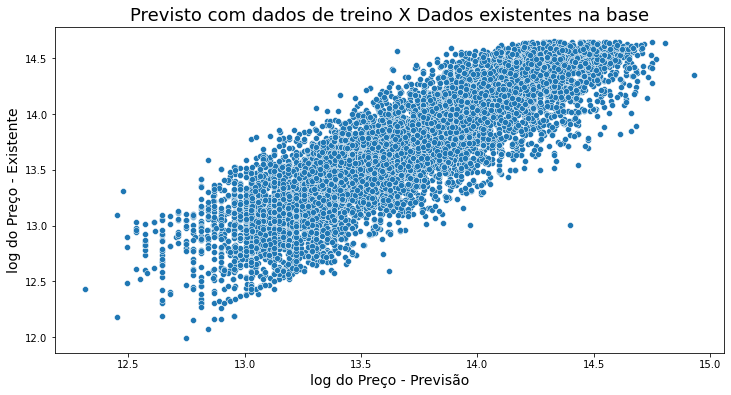

In [ ]:
#gerar gráfico para comparar dados previstos versus dados da base

ax = sns.scatterplot(x=y_previsto_treino, y=y_treino)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsto com dados de treino X Dados existentes na base', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Existente', fontsize=14)
plt.show()

💡 <font color='blue'>O que se espera com esse gráfico?

*   **um comportamento linear a 45°**: não está exatamente a 45°, mas próxima
*   **menor dispersão possível em torno dessa reta**: estão razoavelmente pouco dispersos os dados
*   **regularidade da dispersão ao longo da reta**: os dados estão seguindo a reta de modo consistente

.</font>

####<font color='blue'>5.3.4 Obtenção dos resíduos ✅</font>

A Regressão Linear Simples é um particular tipo de Regressão em que se tem uma variável dependente (Y) e uma única variável independente (X) e o modelo é da forma: Y = A + BX + ε

Os resíduos indicam a variação natural dos dados, um fator aleatório (ou não) que o modelo não capturou. Se as pressuposições do modelo são violadas, a análise será levada a resultados duvidosos e não confiáveis para inferência

In [ ]:
#calcular o resíduo

residuo = y_treino - y_previsto_treino

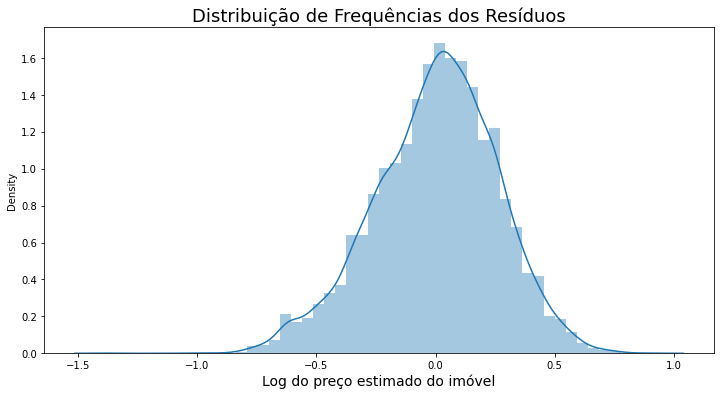

In [ ]:
#plotar o gráfico de distribuição de frequencia do resíduo

ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Log do preço estimado do imóvel', fontsize=14)
plt.show()

💡 <font color='blue'>O que se espera com esse gráfico?</font>

*   **que esteja mais próximo possível de uma distribuição normal**: uma das principais maneiras de se avaliar a qualidade da regressão linear é pela 'normalidade' da distribuição de frequências do resíduo, que no caso estudado está bastante razoável, agregando valor e consistência ao modelo.

##<font color='blue'>📊6. Deploy do modelo 🏆</font>

É importante criar a interface com cliente em ambiente separado do código Python acima.
<hr style='border: 2px solid blue;'>

In [ ]:
#importar biblioteca específica para deploy

import pickle

In [ ]:
#criar código necessário para realizar deploy do modelo externo a esse algoritmo

output = open('/content/drive/MyDrive/Colab Notebooks/Case XXXX/modelo_preco_imoveis', 'wb')
pickle.dump(modelo, output)
output.close()

##<font color='blue'>📊7. Referente ao case apresentado ✅</font>

<hr style='border: 2px solid blue;'>

###<font color='blue'>7.1 Avaliações a partir do modelo ✅</font>

*Suponha que os proprietários dos apartamentos com id's
7818, 9315 e 18338 na base pediram uma avaliação a partir do modelo.*

*Qual é o preço dado pelo seu modelo?* 

*Como você justificaria esses preços para os proprietários?*

In [ ]:
#lista de clientes, conforme endereçados pelo enunciado

lista = [7818, 9315, 18338]

In [ ]:
#criar função para pegar os dados dos clientes na base, e simular uma nova estimativa de valor

def info_cliente(lista):

  for i in lista:
    cliente = i
    quartos = df.iloc[i,5]
    garagens = df.iloc[i,6]
    a_util = df.iloc[i,7]
    valor_real = df.iloc[i,10]
    
    #simular valor
    numero_de_quartos = quartos
    vagas_de_garagem = garagens
    area_util = a_util
    entrada = [[np.log(numero_de_quartos), np.log(vagas_de_garagem), np.log(area_util)]]
    valor_estimado = np.exp(modelo.predict(entrada)[0]).round()

    print(f'O valor estimado pelo modelo de regressão linear ao cliente {cliente} é $ {valor_estimado}, versus $ {valor_real}, que está na base\n')

info_cliente(lista)

O valor estimado pelo modelo de regressão linear ao cliente 7818 é $ 535980.0, versus $ 449542, que está na base

O valor estimado pelo modelo de regressão linear ao cliente 9315 é $ 2986754.0, versus $ 2950500, que está na base

O valor estimado pelo modelo de regressão linear ao cliente 18338 é $ 1017285.0, versus $ 1266570, que está na base



###<font color='blue'>7.1.1 Análise dos 3 casos ✅</font>

In [ ]:
df.iloc[7818]

Unnamed: 0                          7818
id                                  7818
address             Rua Afonso Celso, 83
tower_name                   Torre única
building_type                Apartamento
rooms                                  1
garages                                1
useful_area                           50
latitude                    -23.59203040
longitude                   -46.63525720
point_estimate                    449542
minimum_estimate                  373120
maximum_estimate                  530460
Name: 7818, dtype: object

🙂 <font color='blue'>O que dizer ao cliente id **7818**?</font>

* valor estimado pelo modelo (**535**) versus base de dados(**449**): **⬆ 19%**

*   O modelo chega a um valor específico, mas que o ideal é olhar um intervalo de valores. Os **535 mil** estimados pelo modelo está praticamente colado no máximo do intervalo estimado na base no valor de **530 mil** da **123i**. Por isso, a qualidade do modelo de regressão está excelente!

In [ ]:
df.iloc[9315]

Unnamed: 0                        9315
id                                9315
address             Rua Nova York, 822
tower_name                 Torre única
building_type                Cobertura
rooms                                4
garages                              2
useful_area                        320
latitude                  -23.61172970
longitude                 -46.68124410
point_estimate                 2950500
minimum_estimate               2507920
maximum_estimate               3393070
Name: 9315, dtype: object

🙂 <font color='blue'>O que dizer ao cliente id **9315**?</font>
* valor estimado pelo modelo (**2.986**) versus base de dados(**2.950**): **⬆ 1.2%**
*   O modelo chega a um valor específico, mas que o ideal é olhar um intervalo de valores. Os **2.986 milhões** estimados pelo modelo está quase no meio do intervalo estimado entre **2.5 e 3.3 milhões** pelo **123i**. Por isso, a qualidade do modelo de regressão está excelente!

In [ ]:
df.iloc[18338]

Unnamed: 0                 18338
id                         18338
address                        1
tower_name                     3
building_type        Apartamento
rooms                          4
garages                        2
useful_area                  117
latitude            -23.64177400
longitude           -46.72010590
point_estimate           1266570
minimum_estimate         1051250
maximum_estimate         1494550
Name: 18338, dtype: object

🙂 <font color='blue'>O que dizer ao cliente id **18338**?</font>
* valor estimado pelo modelo (**1.02**) versus base de dados(**1.27**): **⬆ 19%**
*   O modelo chega a um valor específico, mas que o ideal é olhar um intervalo de valores. Os **1.02 milhões** estimados pelo modelo está praticamente colado no mínimo do intervalo estimado na base no valor de **1.05 milhões** do **123i**. Por isso, a qualidade do modelo de regressão está excelente!

###<font color='blue'>7.2 Respostas às sugestões de preços feitas pelos clientes ✅</font>

*Suponha que os proprietários dos apartamentos com ids 7818, 9315 e 18338 na base estão pedindo, respectivamente, 400 mil, 3 milhões e 2 milhões pelos seus apartamentos.*

*Esses preços são razoáveis?*

*Quão longe esses preços estão da realidade do mercado?*

<font color='blue'>O que dizer ao cliente id **7818**?</font>

*   🙂 O modelo de regressão estimou o valor de seu imóvel em **535 mil**, mas você está pedindo apenas **400 mil**. Você está pedindo abaixo do valor de mercado, e deveria revisar o valor para **mais**.

<font color='blue'>O que dizer ao cliente id **9315**?</font>

*   🙂 O modelo de regressão estimou o valor de seu imóvel em **2.986** milhões, e você está pedindo **3 milhões**, valores idênticos! Você está pedindo o valor **correto** do imóvel.

<font color='blue'>O que dizer ao cliente id **18338**?</font>

*   😞 O modelo de regressão estimou o valor de seu imóvel em **1.02 milhões**, mas você está pedindo **2 milhões**. Você está pedindo acima do valor de mercado, e deveria revisar o valor para **menos**.

###<font color='blue'>7.3 Extrapolação ao modelo ✅</font>

*Suponha que você só tenha dados de treino dentro da região
geográfica dada pelo bounding box limitado em latitude pelo intervalo(-23.5884,-23.5495) e em longitude pelo intervalo (-46.6817, -46.6379)*

*Contudo, o seu modelo deve funcionar para toda a região de SP.* 

*Como você validaria o modelo?*

*As variáveis que você coletou funcionariam nesse caso?* 

*Em quais regiões/apartamentos que estão fora do bounding box você espera que o modelo com dados limitados funcione bem?*

###<font color='blue'>7.3.1 Restringir dados de latitude e longitude</font>

In [ ]:
#manter a integridade do DataFrame atual

df5 = df4.copy()

In [ ]:
#restringir as latitudes entre (-23.5884,-23.5495)

valor = df5['latitude']

novas_latitudes = df5[(df5['latitude'] <= -23.5884) | (df5['latitude'] >= -23.5495)].index

df5.drop(novas_latitudes , inplace=True)

In [ ]:
#restringir as longitudes entre (-46.6817, -46.6379)

valor = df5['longitude']

novas_longitudes = df5[(df5['longitude'] <= -46.6817) | (df5['longitude'] >= -46.6379)].index

df5.drop(novas_longitudes , inplace=True)

In [ ]:
#checar a efetividade das ações

df5.describe()

,quartos,garagens,area_util,latitude,longitude,valor_estimado,minimo_estimado,maximo_estimado,log_valor_estimado,log_quartos,log_garagens,log_area_util
count,2578.000000,2578.000000,2578.000000,2578.000000,2578.000000,2.578000e+03,2.578000e+03,2.578000e+03,2578.000000,2578.000000,2578.000000,2578.000000
mean,2.434057,1.316912,105.682700,-23.568155,-46.658408,1.163889e+06,9.853175e+05,1.345031e+06,13.866146,0.818261,0.208285,4.560703
std,0.822012,0.543806,44.759238,0.010243,0.012222,4.965763e+05,4.209410e+05,5.734474e+05,0.468954,0.403222,0.344470,0.466207
min,1.000000,1.000000,22.000000,-23.588400,-46.681679,1.940560e+05,1.649480e+05,2.231650e+05,12.175902,0.000000,0.000000,3.091042
25%,2.000000,1.000000,72.000000,-23.576227,-46.669389,7.768540e+05,6.589405e+05,9.001100e+05,13.563008,0.693147,0.000000,4.276666
50%,3.000000,1.000000,101.500000,-23.567112,-46.655939,1.092680e+06,9.276780e+05,1.262210e+06,13.904144,1.098612,0.000000,4.620047
75%,3.000000,2.000000,136.000000,-23.559920,-46.648046,1.512095e+06,1.278590e+06,1.756165e+06,14.229007,1.098612,0.693147,4.912655
max,4.000000,3.000000,250.000000,-23.549513,-46.637986,2.306000e+06,1.973680e+06,2.651910e+06,14.651025,1.386294,1.098612,5.521461


In [ ]:
#verificar tamanho da nova base mais restrita

df5.shape

(2578, 15)

###<font color='blue'>7.3.2 Criar dados de treino com opções de latitude e longitude restritas ✅</font>

In [ ]:
#criar nova Series com a variável dependente

Y2 = df5['log_valor_estimado']

In [ ]:
#criar novo DataFrame com as variáveis explicativas

x2 = df5[['log_quartos', 'log_garagens', 'log_area_util']]

#separar 20% da base para dados de teste

train_test_split(x2, Y2, test_size=0.2, random_state=1000)

[       log_quartos  log_garagens  log_area_util
 2332      1.098612      0.693147       5.247024
 1134      0.000000      0.000000       3.401197
 5681      1.098612      0.693147       4.672829
 23721     0.693147      0.000000       4.605170
 8882      0.693147      0.000000       4.406719
 ...            ...           ...            ...
 12481     1.098612      0.000000       4.584967
 26463     0.693147      0.000000       4.605170
 22187     0.693147      0.000000       3.806662
 1274      1.098612      0.000000       4.672829
 13532     0.693147      0.000000       5.521461
 
 [2062 rows x 3 columns],        log_quartos  log_garagens  log_area_util
 21118     0.693147      0.000000       4.521789
 170       1.098612      0.693147       4.882802
 5605      0.000000      0.000000       4.605170
 18394     1.098612      0.000000       4.852030
 15015     1.098612      0.000000       5.105945
 ...            ...           ...            ...
 2321      1.098612      0.000000       4.

In [ ]:
#criar novos datasets de treino e teste

X2_treino, X2_teste, y2_treino, y2_teste = train_test_split(x2, Y2, test_size=0.2, random_state=1000)

In [ ]:
#conhecer novos dados de treino

X2_treino.sample(3)

,log_quartos,log_garagens,log_area_util
2358,1.098612,0.693147,5.147494
11920,0.693147,0.000000,4.430817
17098,0.693147,0.000000,4.290459


In [ ]:
#estimar mesmo modelo com statsmodels, segundo a documentação

X2_treino_com_constante = sm.add_constant(X2_treino)
X2_treino_com_constante.sample(2)

,const,log_quartos,log_garagens,log_area_util
1024,1.0,1.098612,0.000000,5.192957
588,1.0,1.098612,0.693147,4.634729


In [ ]:
#utilizar mesmo modelo OLS (Ordinary Least Squares)

modelo_statsmodels = sm.OLS(y2_treino,X2_treino_com_constante,hasconst = True).fit()

In [ ]:
#verificar a qualidade do modelo anterior, só que com os novos dados de treino

print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:     log_valor_estimado   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2842.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:06:36   Log-Likelihood:                 281.65
No. Observations:                2062   AIC:                            -555.3
Df Residuals:                    2058   BIC:                            -532.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.7891      0.069    142.330

###<font color='blue'>7.3.3 Modelo de regressão</font>

In [ ]:
#instanciação do novo modelo

modelo2 =  LinearRegression() 

In [ ]:
#realizar o fit do novo modelo com novos dados de treino

modelo2.fit(X2_treino, y2_treino)

LinearRegression()

In [ ]:
#obter coeficiente de determinação R² para novos dados de treino

print('R² = {}'.format(modelo2.score(X2_treino, y2_treino).round(3)))

R² = 0.806


In [ ]:
#previsão para mesmos dados de teste

y2_previsto = modelo2.predict(X_teste)

In [ ]:
#obter coeficiente de determinação R² para mesmos dados de teste

print('R² = %s' % metrics.r2_score(y_teste, y2_previsto).round(3))

R² = 0.569


In [ ]:
#criação de variável de teste (em escala logarítmica)

entrada2 = X_teste[0:1]
entrada2

,log_quartos,log_garagens,log_area_util
6877,0.0,0.0,3.850148


###<font color='blue'>7.3.4 Predição do modelo</font>

In [ ]:
#realização de predição pontual (em escala logarítmica)

modelo2.predict(entrada)[0]

14.101496551353241

In [ ]:
#reverter o logaritmo por meio de exponencial

np.exp(modelo2.predict(entrada)[0]).round(0)

1331074.0

In [ ]:
#comparar com valor real da base de testes

np.exp(y_teste.head(1))

6877    542977.0
Name: log_valor_estimado, dtype: float64

In [ ]:
#elaborar simulação com dados de treino novos e de testes anterior

numero_de_quartos = 3
vagas_de_garagem = 2
area_util = 115
entrada = [[np.log(numero_de_quartos), np.log(vagas_de_garagem), np.log(area_util)]]

print('R$ {0: 2f}'.format(np.exp(modelo2.predict(entrada)[0])))

R$  1331073.811289


###<font color='blue'>7.3.5 Coeficientes de regressão</font>

In [ ]:
#intercepto (escala logarítmica), conforme tabela do item 4.4.1

modelo2.intercept_

9.789102520249354

In [ ]:
#intercepto na escala normal

np.exp(modelo2.intercept_).round()

17838.0

In [ ]:
#3 coeficientes, respectivamente: 'log_quartos', 'log_garagens', 'log_area_util'

modelo2.coef_

array([-0.05523749,  0.17761945,  0.89568451])

In [ ]:
#criar lista com as variáveis do modelo

index = ['Intercepto','log quartos', 'log garagens', 'log area util']

In [ ]:
#criar DataFrame para armazenar coeficientes do modelo

pd.DataFrame(data=np.append(modelo2.intercept_, modelo2.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.789103
log quartos,-0.055237
log garagens,0.177619
log area util,0.895685


In [ ]:
#realizar previsões também com a base de dados de treino

y2_previsto_treino = modelo2.predict(X2_treino)

###<font color='blue'>7.3.6 Qualidade dos dados estimados</font>

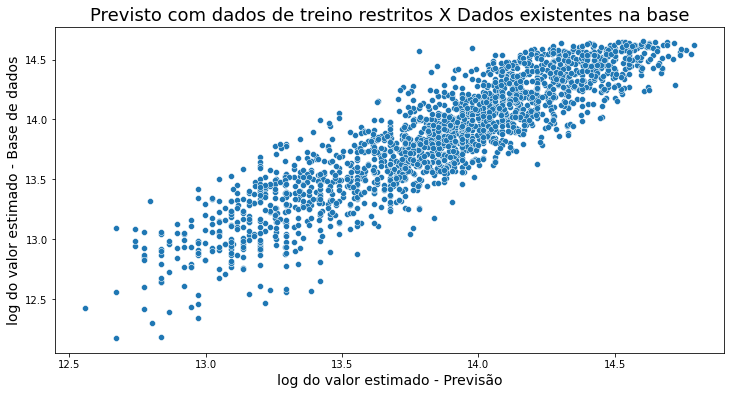

In [ ]:
#gerar gráfico para comparar dados previstos versus dados da base

ax = sns.scatterplot(x=y2_previsto_treino, y=y2_treino)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsto com dados de treino restritos X Dados existentes na base', fontsize=18)
ax.set_xlabel('log do valor estimado - Previsão', fontsize=14)
ax.set_ylabel('log do valor estimado - Base de dados', fontsize=14)
plt.show()

###<font color='blue'>7.3.7 Cálculo dos resíduos</font>

In [ ]:
#calcular o novo resíduo

residuo2 = y2_treino - y2_previsto_treino

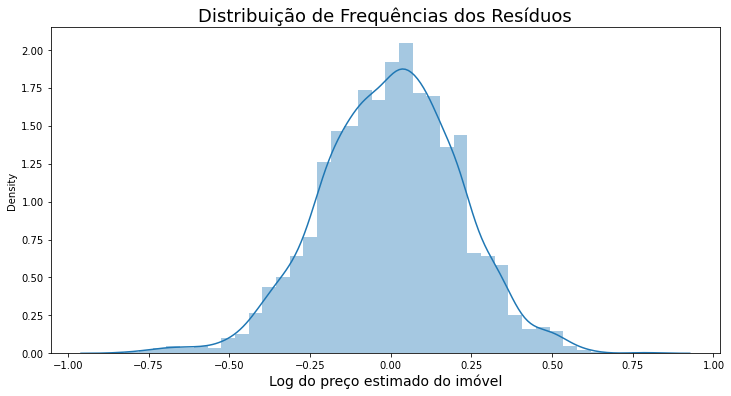

In [ ]:
#plotar o gráfico de distribuição de frequencia do resíduo

ax = sns.distplot(residuo2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Log do preço estimado do imóvel', fontsize=14)
plt.show()

###<font color='blue'>7.3.8 Conclusões</font>

💡 <font color='blue'>Resumo das conclusões rodando o modelo de regressão com dados de treino mais restritos, mas dados de testes mais gerais</font>

-   verificando o resultado de R², houve melhora de **0.734** para **0.806**
-   contudo, como os dados de teste vieram da base original, o R² ficou bem abaixo (**0.569**), o que era esperado, pois testou-se o modelo com dados de teste com DataFrame diferente dos dados de treino.

-   o mais grave ocorreu numa primeira estimativa feita com o id **6877**:
--  no modelo inicial, a previsão de regressão foi de **501 mil** (versus valor da base: **543 mil**)
--  no modelo com restrições, a previsão de regressão foi de **1.3 milhão** (quase o triplo do anterior)

-   numa nova estimativa feita com o id **15403**:
--  no modelo inicial, a previsão de regressão foi de **1.07 milhão** (versus valor da base: **1.16 milhão**)
--  no modelo com restrições, a previsão de regressão foi de **1.33 milhão** (revelando a instabilidade do modelo aplicado à nova condição)

- por fim, os gráficos de previsto versus base, e resíduos não diferiram muito do encontrado na primeira aplicação do modelo

❗ <font color='red'>Desaconselho restringir a base de dados de treino, mantendo uma base de testes maior e, por consequência, diferente.</font>

###<font color='blue'>7.4 Eficiência da amostra ✅</font>

*Qual é o tamanho mínimo da base de treino para ter uma performance razoável (parecida com a performance da base completa)?*

- Considerando que as bases de treino e de testes venham da mesma amostragem, fico mais uma vez com a orientação da equipe MINITAB: "Um tamanho amostral que for menor que 20 pode não fornecer poder suficiente para detectar diferencias significativas entre os dados da sua amostra e a distribuição normal."

*Se você pudesse escolher somente 1000 linhas da base para treinar o modelo, quais linhas você escolheria?*

'Para garantir que seus resultados sejam válidos, considere as seguintes diretrizes ao coletar dados, realizar a análise e interpretar os resultados.

-   **Os dados devem ser numéricos**: você deve ter dados contínuos ✅

-   **Os dados da amostra devem ser selecionados aleatoriamente**: nas estatísticas, as amostras aleatórias são usadas para fazer generalizações ou inferências, sobre uma população. Se seus dados não foram coletados aleatoriamente, seus resultados podem não representar a população' ⛔ 

fonte MINITAB: (https://support.minitab.com/pt-br/minitab/21/help-and-how-to/statistics/basic-statistics/how-to/normality-test/before-you-start/data-considerations/)

##<font color='blue'>📊8. That's all!</font>

<hr style='border: 2px solid blue;'>

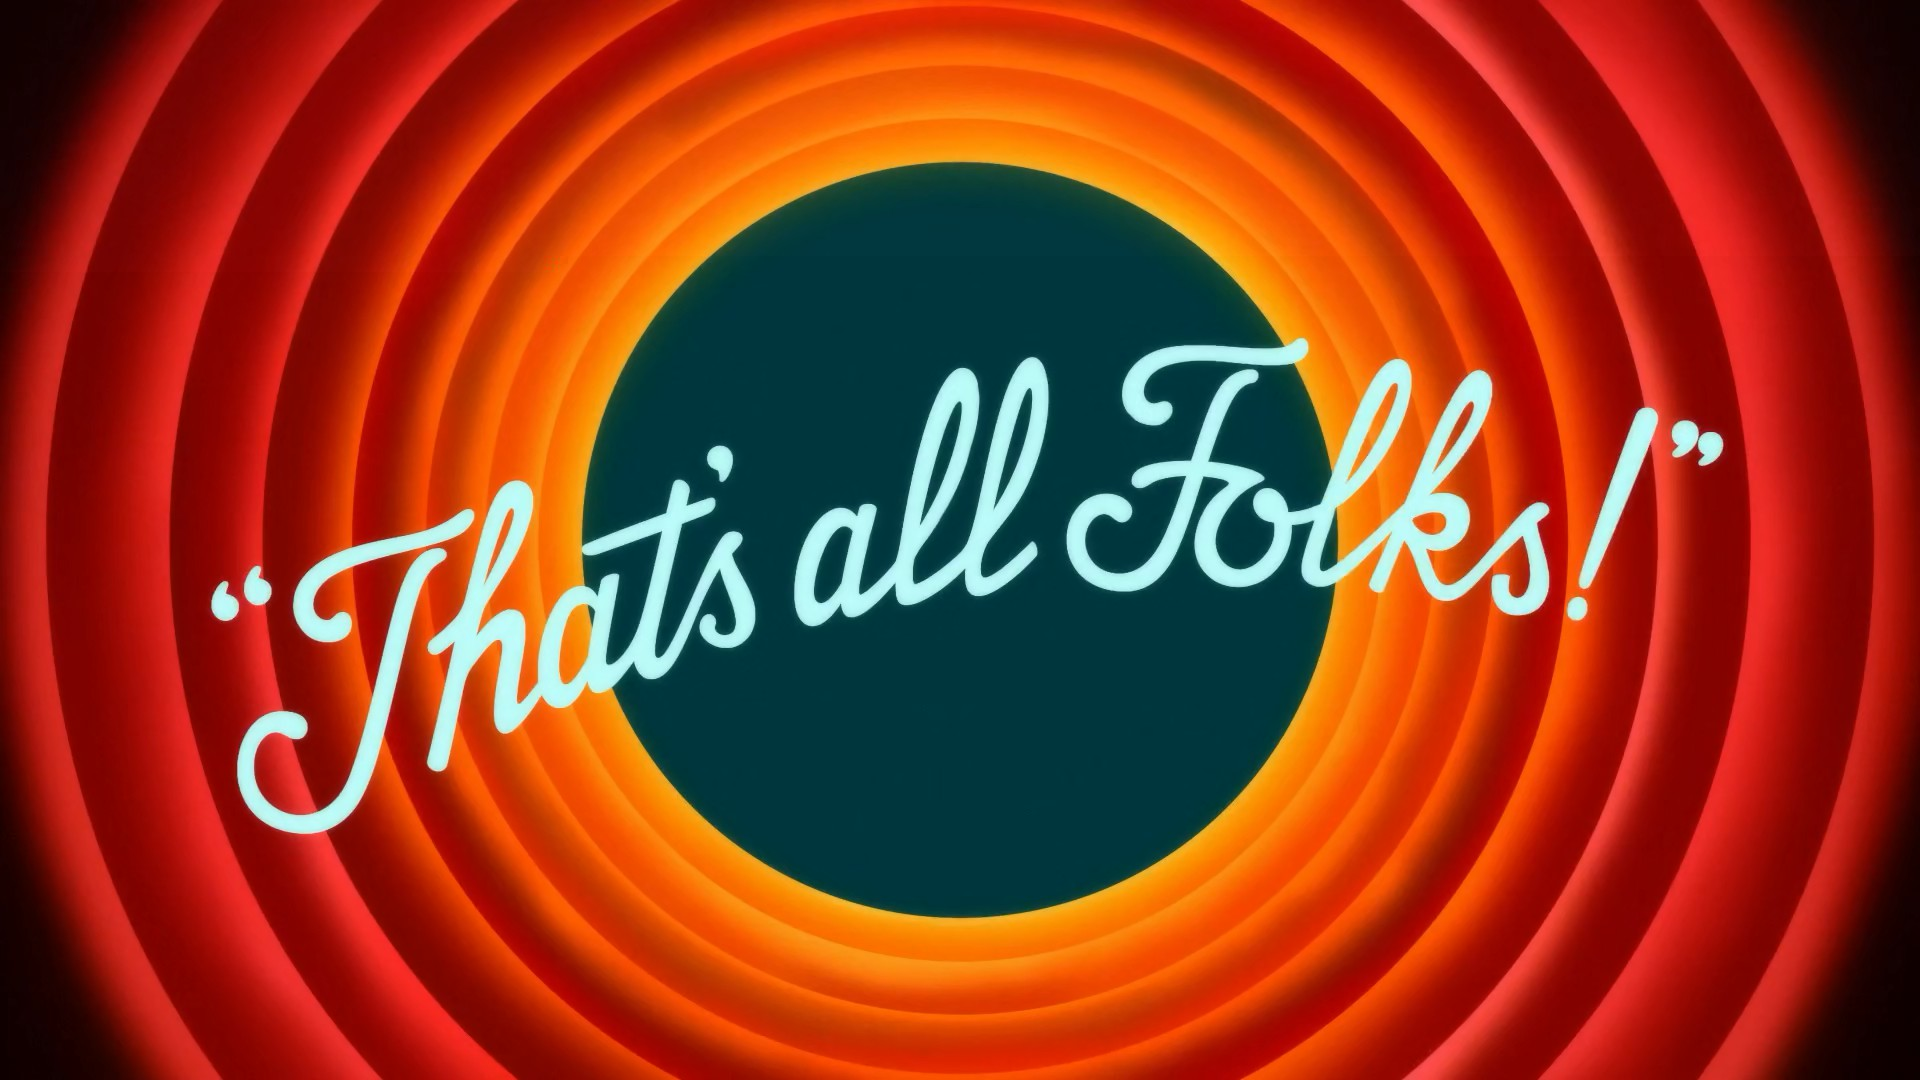